# Understanding Descriptive Statistics

Import the necessary libraries here:

In [25]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [26]:
# your code here

def roll_dice(number_of_throws, dice_faces=6):
    rolls = np.random.randint(1, dice_faces+1, number_of_throws)
    return pd.DataFrame({'roll': rolls})

In [27]:
results_30 = roll_dice(30, 10)
results_30.head(10)

,roll
0,1
1,8
2,7
3,1
4,6
5,10
6,9
7,6
8,10
9,9


#### 2.- Plot the results sorted by value.

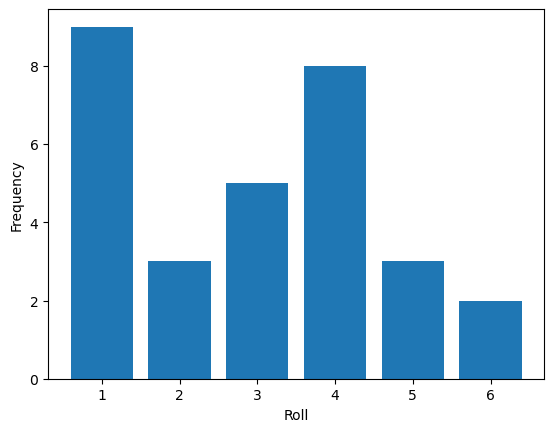

In [28]:
# your code here

results_30 = roll_dice(30)
sorted_results = results_30['roll'].value_counts().sort_index()

plt.bar(sorted_results.index, sorted_results.values)
plt.xlabel('Roll')
plt.ylabel('Frequency')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

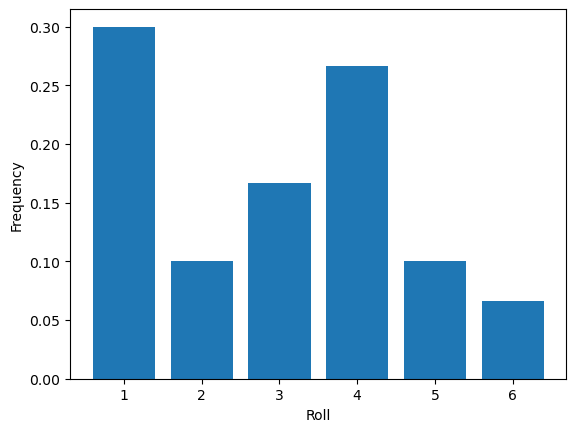

In [29]:
# your code here
freq_dist = results_30['roll'].value_counts(normalize=True).sort_index()

plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('Roll')
plt.ylabel('Frequency')
plt.show()

In [30]:
"""
The bar plot gives the same information, however the y-axis now adds up to 1. Basically, in the first one frequency 
shows the number of times each value appeared in roll whilst second one shows proportion of rolls resulted in each value
"""

'\nThe bar plot gives the same information, however the y-axis now adds up to 1. Basically, in the first one frequency \nshows the number of times each value appeared in roll whilst second one shows proportion of rolls resulted in each value\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [62]:
# your code here

def obs_mean(data):
    total = 0
    count = 0
    for value in data['roll']:
        total += value
        count += 1
    return total / count
obs_mean(results_30)

2.966666666666667

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [32]:
results_30.value_counts()
results_2 = results_30.value_counts() / results_30.shape[0]
pd.DataFrame(results_2)
def mean_freq(data):
    total = 0
    count = 0
    results_2 = data.value_counts() / data.shape[0]
    freq_df = results_2
    return freq_df.sum() / freq_df.shape[0]
results_30.apply(mean_freq)

roll    0.166667
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [34]:
# your code here
def obs_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    if n % 2 == 1:
        median_index = n // 2
        median = sorted_data[median_index]
    else:
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2
        
    return median
results_30.apply(obs_median)

roll    3.0
dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [35]:
# your code here
def obs_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    q2 = calculate_median(sorted_data)
    
    if n % 2 == 1:
        lower_half = sorted_data[:n//2]
        upper_half = sorted_data[n//2+1:]
    else:
        lower_half = sorted_data[:n//2]
        upper_half = sorted_data[n//2:]
    
    q1 = calculate_median(lower_half)
    q3 = calculate_median(upper_half)
    
    return q1, q2, q3
results_30.apply(obs_quartiles)

,roll
0,1.0
1,3.0
2,4.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

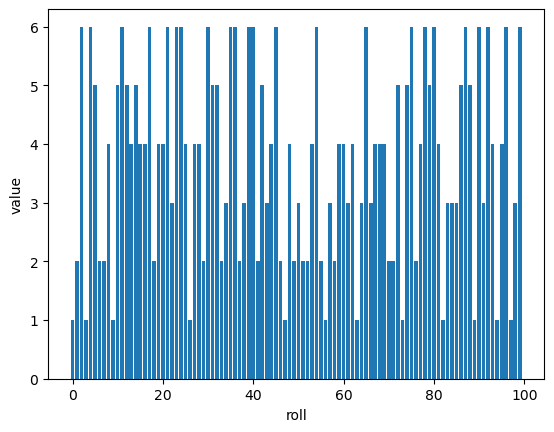

In [39]:
# your code here
df = pd.read_csv('roll_the_dice_hundred.csv').sort_index()
sorted_df = df['value'].sort_index()
plt.bar(sorted_df.index, sorted_df.values)
plt.xlabel('roll')
plt.ylabel('value')
plt.show()

In [63]:
df

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [ ]:
"""
It is too messy, probably too many rolls involved
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [65]:
# your code here
obs_mean(df)

49.5

In [66]:
df.mean()

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [45]:
# your code here
df.apply(mean_freq)

Unnamed: 0    0.010000
roll          0.010000
value         0.166667
dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<function matplotlib.pyplot.show(close=None, block=None)>

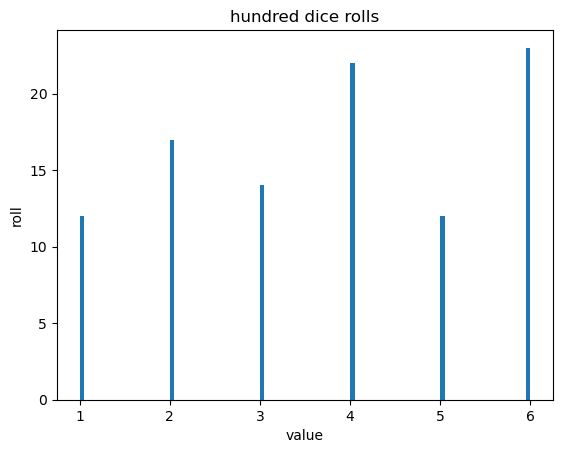

In [73]:
# your code here
df['value'].plot.hist(bins=100)
plt.xlabel('value')
plt.ylabel('roll')
plt.title('hundred dice rolls')
plt.show

In [ ]:
"""
We can add an additional vertical line through function plt.axvline() to represent the mean
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

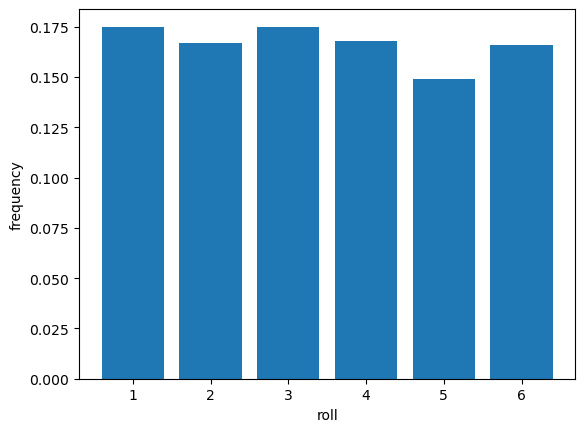

In [72]:
# your code here
df_2 = pd.read_csv('roll_the_dice_thousand.csv')

freq_dist = df_2['value'].value_counts(normalize=True).sort_index()

plt.bar(freq_dist.index, freq_dist.values)
plt.xlabel('roll')
plt.ylabel('frequency')
plt.show()

In [ ]:
"""
Because there are more random values of rolls. So if thousand of them were made, it might be that they differ from number
of rolls made before.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [74]:
# your code here
ages_1 = pd.read_csv('ages_population.csv')
ages_1
freq_dist_ages = ages_1['observation'].value_counts(normalize=True)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


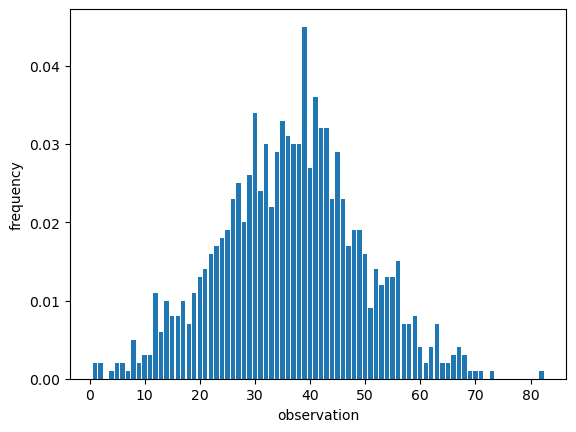

In [86]:
freq_dist_ages = ages_1['observation'].value_counts(normalize=True)
plt.bar(freq_dist_ages.index, freq_dist_ages.values)
plt.xlabel('observation')
plt.ylabel('frequency')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [81]:
# your code here
ages_1.mean()

observation    36.56
dtype: float64

In [83]:
std_dev_ages_1 = ages_1.std() 
std_dev_ages_1

observation    12.8165
dtype: float64

In [ ]:
"""
I have guessed the mean almost accurately, my guess was around 35-40, but for std it was more tough, I could not stick with
one number as it is more hard to guess.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [84]:
# your code here
ages_2 = pd.read_csv('ages_population2.csv')
ages_2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


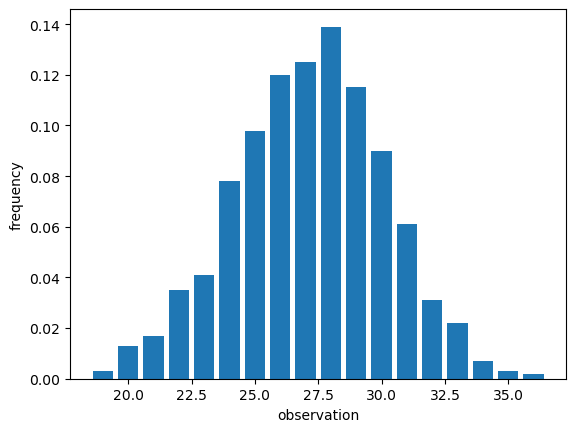

In [85]:
freq_ages_2 = ages_2['observation'].value_counts(normalize=True)
plt.bar(freq_ages_2.index, freq_ages_2.values)
plt.xlabel('observation')
plt.ylabel('frequency')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
There is a slight difference. In this plot, it is more balanced whereas in the first one the distribution is more chaotic.
For instance, in the first one we see observation value 39 being way above others, and overall it is more random. In this one
it goes from bottom to top like a pyramid.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [87]:
# your code here
ages_2.mean()

observation    27.155
dtype: float64

In [88]:
ages_2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
Second plot is more precise. Std is only 2.96 which is far better than having a std of 12.8 which is way too high.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [89]:
# your code here
ages_3 = pd.read_csv('ages_population3.csv')
ages_3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


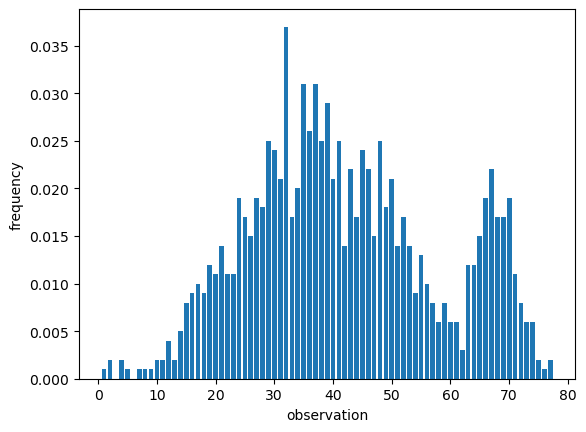

In [90]:
freq_ages_3 = ages_3['observation'].value_counts(normalize=True)
plt.bar(freq_ages_3.index, freq_ages_3.values)
plt.xlabel('observation')
plt.ylabel('frequency')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [97]:
# your code here
ages_3.mean()

observation    41.989
dtype: float64

In [98]:
ages_3.std()

observation    16.144706
dtype: float64

In [ ]:
"""
Std is very high because the values in plot are too unordered. At the end values go up which does not occur in normal
distribution so there is a negative skewness present.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [99]:
# your code here
ages_3.apply(obs_quartiles)

,observation
0,30.0
1,40.0
2,53.0


In [ ]:
"""
The difference between median and mean is very low, however the q3 is slightly higher than it usually is, which is probably why
the skewness occurred.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""